In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=np.genfromtxt('kmeans.txt',delimiter=" ")

In [3]:
print(data)

[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]
 [-3.567919  1.531611]
 [ 0.450614 -3.302219]
 [-3.487105 -1.724432]
 [ 2.668759  1.594842]
 [-3.156485  3.191137]
 [ 3.165506 -3.999838]
 [-2.786837 -3.099354]
 [ 4.208187  2.984927]
 [-2.123337  2.943366]
 [ 0.704199 -0.479481]
 [-0.39237  -3.963704]
 [ 2.831667  1.574018]
 [-0.790153  3.343144]
 [ 2.943496 -3.357075]
 [-3.195883 -2.283926]
 [ 2.336445  2.875106]
 [-1.786345  2.554248]
 [ 2.190101 -1.90602 ]
 [-3.403367 -2.778288]
 [ 1.778124  3.880832]
 [-1.688346  2.230267]
 [ 2.592976 -2.054368]
 [-4.007257 -3.207066]
 [ 2.257734  3.387564]
 [-2.679011  0.785119]
 [ 0.939512 -4.023563]
 [-3.674424 -2.261084]
 [ 2.046259  2.735279]
 [-3.18947   1.780269]
 [ 4.372646 -0.822248]
 [-2.579316 -3.497576]
 [ 1.889034  5.1904  ]
 [-0.798747  2.185588]
 [ 2.83652  -2.658556]
 [-3.837877 -3.253815]
 [ 2.096701  3.886007]
 [-2.709034  2.923887]
 [ 3.367037 -3.184789]
 [-2.121479

In [4]:
data.shape

(80, 2)

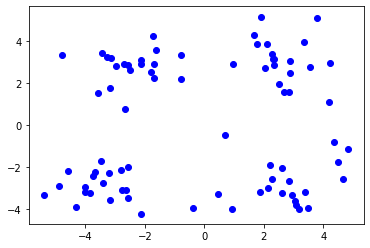

In [5]:
plt.scatter(data[:,0],data[:,1],c='b')

In [6]:
def dis(vector1, vector2):  
    return np.sqrt(sum((vector2 - vector1)**2))

In [7]:
def init(data, k):  
    numSamples, dim = data.shape
    # k个质心，列数跟样本的列数一样
    cent = np.zeros((k, dim))  
    # 随机选出k个质心
    for i in range(k):  
        # 随机选取一个样本的索引
        index = int(np.random.uniform(0, numSamples))  
        # 作为初始化的质心
        cent[i, :] = data[index, :]  
    return cent 

In [8]:
# 计算距离 
def dis(vector1, vector2):  
    return np.sqrt(sum((vector2 - vector1)**2))
  
# 初始化质心
def initCentroids(data, k):  
    numSamples, dim = data.shape
    # k个质心，列数跟样本的列数一样
    centroids = np.zeros((k, dim))  
    # 随机选出k个质心
    for i in range(k):  
        # 随机选取一个样本的索引
        index = int(np.random.uniform(0, numSamples))  
        # 作为初始化的质心
        centroids[i, :] = data[index, :]  
    return centroids  
  
# 传入数据集和k的值
def kmeans(data, k):  
    # 计算样本个数
    numSamples = data.shape[0]   
    # 样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
    clusterData = np.array(np.zeros((numSamples, 2)))  
    # 决定质心是否要改变的变量
    clusterChanged = True  
  
    # 初始化质心  
    centroids = initCentroids(data, k)  
  
    while clusterChanged:  
        clusterChanged = False  
        # 循环每一个样本 
        for i in range(numSamples):  
            # 最小距离
            minDist  = 100000.0  
            # 定义样本所属的簇
            minIndex = 0  
            # 循环计算每一个质心与该样本的距离
            for j in range(k):  
                # 循环每一个质心和样本，计算距离
                distance = dis(centroids[j, :], data[i, :])  
                # 如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist:  
                    minDist  = distance  
                    # 更新样本所属的簇
                    minIndex = j  
                    # 更新最小距离
                    clusterData[i, 1] = distance
              
            # 如果样本的所属的簇发生了变化
            if clusterData[i, 0] != minIndex:  
                # 质心要重新计算
                clusterChanged = True
                # 更新样本的簇
                clusterData[i, 0] = minIndex
  
        # 更新质心
        for j in range(k):  
            # 获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            # 第j个簇所有的样本点
            pointsInCluster = data[cluster_index]  
            # 计算质心
            centroids[j, :] = np.mean(pointsInCluster, axis = 0) 
#         showCluster(data, k, centroids, clusterData)
  
    return centroids, clusterData  
  
# 显示结果 
def showCluster(data, k, centroids, clusterData):  
    numSamples, dim = data.shape  
    if dim != 2:  
        print("dimension of your data is not 2!")  
        return 1  
  
    # 用不同颜色形状来表示各个类别
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("Your k is too large!")  
        return 1  
  
    # 画样本点  
    for i in range(numSamples):  
        markIndex = int(clusterData[i, 0])  
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])  
  
    # 用不同颜色形状来表示各个类别
    mark = ['*r', '*b', '*g', '*k', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # 画质心点 
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
  
    plt.show()

In [9]:
def showCluster(data, k, centroids, clusterData):  
    numSamples, dim = data.shape  
    if dim != 2:  
        print("dimension of your data is not 2!")  
        return 1  
  
    # 用不同颜色形状来表示各个类别
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("Your k is too large!")  
        return 1  
  
    # 画样本点  
    for i in range(numSamples):  
        markIndex = int(clusterData[i, 0])  
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])  
  
    # 用不同颜色形状来表示各个类别
    mark = ['*r', '*b', '*g', '*k', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # 画质心点 
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
  
    plt.show()
    

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
E:\anaconda\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


cluster complete!


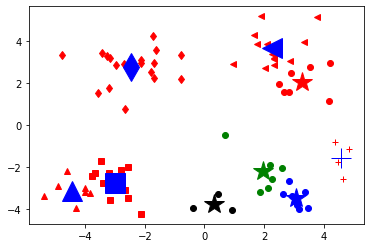

In [10]:
list_lost=[]
for k in range(2,10):
    min_loss = 10000
    min_loss_centroids = np.array([])
    min_loss_clusterData = np.array([])

    for i in range(50):
        # centroids 簇的中心点 
        # cluster Data样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
        centroids, clusterData = kmeans(data, k)  
        loss = sum(clusterData[:,1])/data.shape[0]
        if loss < min_loss:
            min_loss = loss
            min_loss_centroids = centroids
            min_loss_clusterData = clusterData
    list_lost.append(min_loss)  
#     print('loss',min_loss)
print('cluster complete!')      
centroids = min_loss_centroids
clusterData = min_loss_clusterData

# 显示结果
showCluster(data, k, centroids, clusterData)

In [11]:
list_lost

[2.9811811738953176,
 1.9708559728104191,
 1.1675654672086735,
 1.0712368269135584,
 1.0033240887599812,
 0.9422326013676173,
 0.901545820243473,
 0.8331784913104145]

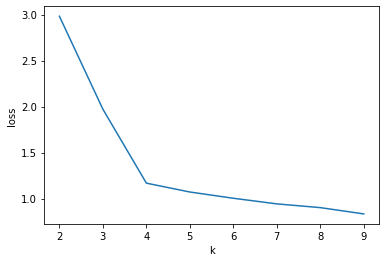

In [12]:
plt.plot(range(2,10),list_lost)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

In [13]:
x_test=[0,1]
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [14]:
X=np.tile(x_test,(k,1))-centroids

In [15]:
X=X**2

In [16]:
X

array([[10.64123769,  1.15167668],
       [ 9.41733704, 20.07481752],
       [ 3.84116816, 10.19663481],
       [ 0.110613  , 22.68771224],
       [19.6922329 , 16.96982711],
       [21.06582342,  6.6322525 ],
       [ 9.0961992 , 14.15446675],
       [ 6.05919468,  3.19471136],
       [ 5.21804793,  7.10897889]])

In [17]:
X=X.sum(axis=1)

In [18]:
np.argmin(X)

7

In [19]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data,(k,1))-centroids)**2).sum(axis=1)) for data in datas])

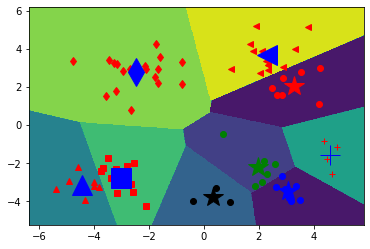

In [20]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 显示结果
showCluster(data, k, centroids, clusterData)  